
**Cats and Dogs dataset - ResNet50**

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
#batch size
bs=64

In [3]:
#gets the path of pets dataset in fastai
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
#saving paths in variables
path_anno = path/'annotations'
path_img = path/'images'

In [5]:
#displaying some file names
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_51.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_186.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_114.jpg')]

In [0]:
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=299, bs=bs//2).normalize(imagenet_stats)

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


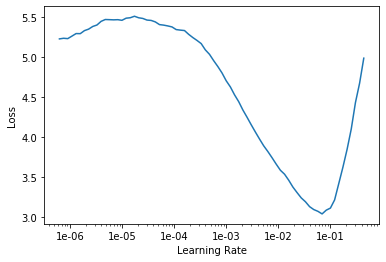

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.747994,0.318076,0.106225,02:12
1,0.505706,0.253497,0.085927,02:09
2,0.405763,0.267675,0.078484,02:08
3,0.322888,0.231631,0.073748,02:08
4,0.263480,0.182407,0.060893,02:07
5,0.176768,0.174343,0.055480,02:06
6,0.145714,0.170739,0.050744,02:06
7,0.108194,0.171077,0.047361,02:06


In [0]:
learn.save('stage-1-50')

In [12]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.114456,0.170377,0.048038,02:15
1,0.100125,0.167141,0.048714,02:15
2,0.088379,0.165409,0.042625,02:17


In [0]:
learn.load('stage-1-50');

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

In [15]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'american_bulldog', 7),
 ('basset_hound', 'beagle', 5),
 ('Birman', 'Ragdoll', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Ragdoll', 'Birman', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('British_Shorthair', 'Bombay', 2),
 ('Persian', 'Ragdoll', 2),
 ('Siamese', 'Birman', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('saint_bernard', 'boxer', 2)]